In [77]:
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

In [78]:
data = pd.read_excel("df_preprocessed.xlsx")

In [79]:
data = data[(data['X-Max'] != 10000) & (data['X-Max'] != 0)]
data = data[data['Relevant fuer Messung'] == 'Ja']
data_boundingbox = data.loc[:,["Benennung (dt)", "center_x","center_y","center_z"]]
X = data_boundingbox[['center_x', 'center_y', 'center_z']].values

In [85]:
dbscan = DBSCAN(eps=150, min_samples=2).fit(X)

# Extract the labels assigned by the model
labels = dbscan.labels_

data_boundingbox['cluster_label'] = labels
data_boundingbox = data_boundingbox.sort_values(by="cluster_label")

data_boundingbox.to_excel("clusters.xlsx")

# Print the number of clusters found
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print('Number of clusters found:', n_clusters)

# Print the cluster labels assigned to each data point
print('Cluster labels:', labels)

Number of clusters found: 24
Cluster labels: [ 0  0 -1  1  2  3  4  5  6  7  8  9 10  0  0 11 12  3  4  9 11  5  6  7
 13  0  0 14  1  3  4  5  6  8 13 15 10 -1 10  1  1  1  1  2  1 12  3 -1
  4 15  5 16  6 17 18 -1 10 13 -1 -1 15 10 10  1  1 14  1  2  1 12 -1 -1
 19 15  3  5 16 20  7 17 18 -1 10  2 -1  9 18 10 21  1  1 22 14  1 12  3
 19 15  5 16  6  7  8 23 10  2 10 21  1 20 22  1 22 16  6  7  8  3 19  9
 23 10  9]


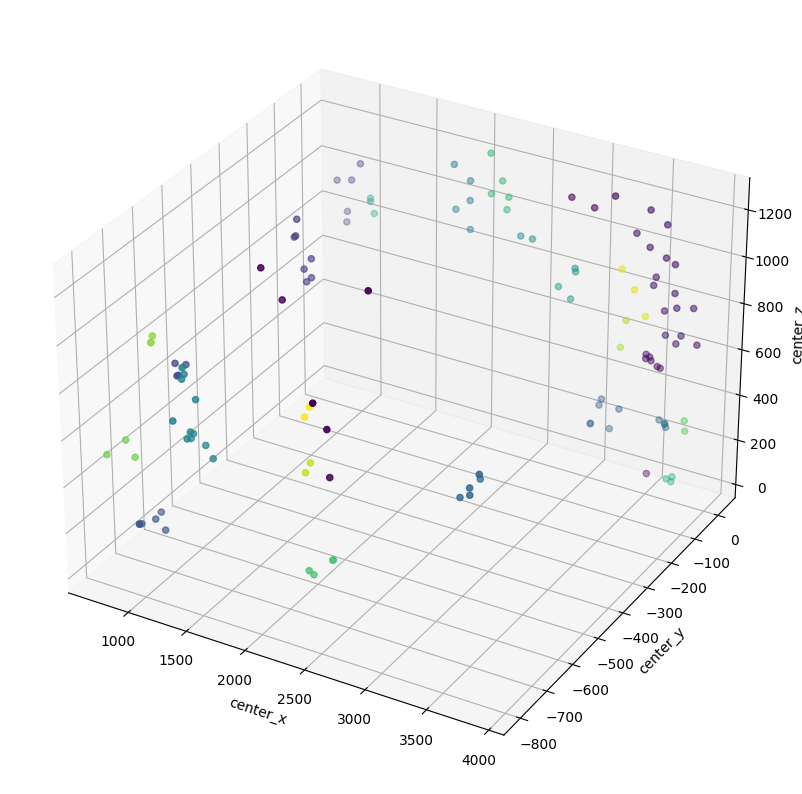

In [86]:
# Create a 3D plot of the center points with different colors for each cluster
fig = plt.figure(figsize=(10, 20), dpi=100)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=labels)
ax.set_xlabel('center_x')
ax.set_ylabel('center_y')
ax.set_zlabel('center_z')
plt.show()